In [ ]:
import pandas as pd
import numpy as np

import math

from scipy.spatial import distance 
from shapleyx import rshdmr


from scipy.stats import qmc

import matplotlib.pyplot as plt

from itertools import combinations

In [13]:
shapleyx.__version__

AttributeError: module 'shapleyx' has no attribute '__version__'

### Case Study: High-Dimensional Product Function  
To validate the proposed RS-HDMR method for estimating Sobol indices and Shapley effects, we apply it to the product function studied by Owen [1], a benchmark designed to stress-test sensitivity estimators in high-dimensional settings. The function is defined as:  

$$
f(\mathbf{x}) = \prod_{j=1}^{d} \left( \mu_j + \tau_j g_j(x_j) \right), \quad x_j \in [0, 1],
$$  

where $g_j(x_j) = \sqrt{12}(x_j - 1/2)$ ensures zero mean and unit variance, $\mu_j = 1$ for all $j$, and $\tau_j = (4, 4, 2, 2, 1, 1)/4$ for $d = 6$. This configuration creates a hierarchy of variable importance, with diminishing contributions from inputs $x_1$ to $x_6$, and analytically tractable Sobol indices given by $\sigma_u^2 = \prod_{j \in u} \tau_j^2 \prod_{j \notin u} \mu_j^2$.  

---
[1] Owen, Art B. 2013. ‘Better Estimation of Small Sobol’ Sensitivity Indices’. ACM Transactions on Modeling and Computer Simulation 23 (2): 1–17. https://doi.org/10.1145/2457459.2457460.

## Overview 2

In [22]:
def get_column_labels(num_columns):
    return [f'X{i+1}' for i in range(num_columns)]

def owen(m, d, tau_values, mu_values):
    num_dimensions = d
    tau_values = [1, 1, 0.5, 0.5, 0.25, 0.25]
    mu_values = [1, 1, 1, 1, 1, 1]
    
    num_samples = 2**m
    sampler = qmc.Sobol(d, scramble=True, seed=123)
    samples = sampler.random_base2(m)
    
    # Initialize Y with ones and compute product
    Y = np.ones(num_samples)
    for dim in range(num_dimensions):
        g = np.sqrt(12) * (samples[:, dim] - 0.5)
        Y *= (mu_values[dim] + tau_values[dim] * g)
    
    data = pd.DataFrame(samples, columns=get_column_labels(num_dimensions))
    data['Y'] = Y
    return data


In [23]:
# m = 6 -> 64 samples
# m = 7 -> 128 samples
# m = 8 -> 256 samples
# m = 9 -> 512 samples
# m = 10 -> 1024 samples
# m = 11 -> 2048 samples 
# m = 12 -> 4096 samples
# m = 13 -> 8192 samples

m=11

d = 6
tau = [1, 1, 0.5, 0.5, 0.25, 0.25]
mu = [1, 1, 1, 1, 1, 1]


dataframe = owen(m, d, tau, mu)
print(len(dataframe), 'samples generated')

2048 samples generated


Found a DataFrame

Transforming data to unit hypercube

Feature: X1, Min Value: 0.0001, Max Value: 0.9997
Feature: X2, Min Value: 0.0000, Max Value: 0.9999
Feature: X3, Min Value: 0.0004, Max Value: 1.0000
Feature: X4, Min Value: 0.0004, Max Value: 0.9999
Feature: X5, Min Value: 0.0001, Max Value: 0.9997
Feature: X6, Min Value: 0.0004, Max Value: 0.9999

Building basis functions

Basis functions of 1 order : 48
Basis functions of 2 order : 375
Basis functions of 3 order : 1280
Basis functions of 4 order : 3840
Total basis functions in basis set : 5543
Total number of features in basis set is 5543

Running regression analysis

running ARD
Iteration: 0     Mean CV Score: 0.3303, Percentage Change: inf%
Iteration: 1     Mean CV Score: 0.4967, Percentage Change: 50.40%
Iteration: 2     Mean CV Score: 0.5403, Percentage Change: 8.77%
Iteration: 3     Mean CV Score: 0.5827, Percentage Change: 7.85%
Iteration: 4     Mean CV Score: 0.6247, Percentage Change: 7.22%
Iteration: 5     Mean CV Scor

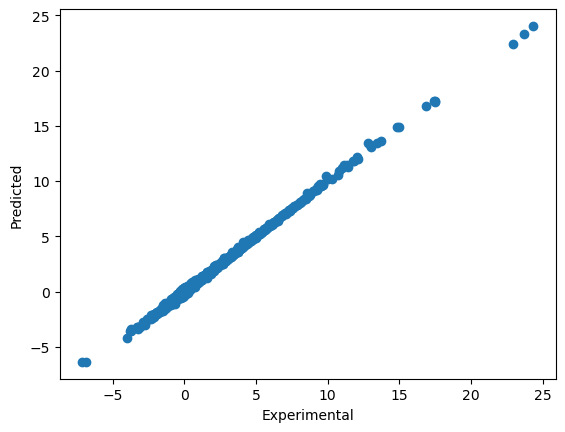


Running bootstrap resampling 1000 samples for 95.0% CI

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 

Completed bootstrap resampling


                  Completed all analysis
                 ------------------------

Through pride we are ever deceiving ourselves. But deep
down below the surface of the average conscience a still,
small voice says to us, Something is out of tune.  Carl
Jung



In [24]:
model = rshdmr(dataframe,
               polys = [8, 5, 4, 4],
               n_iter = 250,
#               verbose=True,
               method = 'ard_cv',
               cv_tol=0.005
              )
               
sob, shap, total = model.run_all() 

In [26]:
shap

,label,effect,scaled effect,lower,upper
0,X1,0.346743,0.347188,0.345599,0.348926
1,X2,0.346858,0.347303,0.345304,0.349147
2,X3,0.119249,0.119402,0.118162,0.120457
3,X4,0.119507,0.119660,0.118384,0.120724
4,X5,0.033049,0.033091,0.032300,0.033730
5,X6,0.033313,0.033355,0.032381,0.034182


In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Apr 03 2025

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

pandas    : 2.2.2
scipy     : 1.12.0
numpy     : 1.26.4
matplotlib: 3.8.4
shapleyx  : 0.1

Watermark: 2.5.0




### Case Study: High-Dimensional Product Function  
To validate the proposed RS-HDMR method for estimating Sobol indices and Shapley effects, we apply it to the product function studied by Owen [1], a benchmark designed to stress-test sensitivity estimators in high-dimensional settings. The function is defined as:  

$$
f(\mathbf{x}) = \prod_{j=1}^{d} \left( \mu_j + \tau_j g_j(x_j) \right), \quad x_j \in [0, 1],
$$  

where $g_j(x_j) = \sqrt{12}(x_j - 1/2)$ ensures zero mean and unit variance, $\mu_j = 1$ for all $j$, and $\tau_j = (4, 4, 2, 2, 1, 1)/4$ for $d = 6$. This configuration creates a hierarchy of variable importance, with diminishing contributions from inputs $x_1$ to $x_6$, and analytically tractable Sobol indices given by $\sigma_u^2 = \prod_{j \in u} \tau_j^2 \prod_{j \notin u} \mu_j^2$.  


[1] Owen, Art B. 2013. ‘Better Estimation of Small Sobol’ Sensitivity Indices’. ACM Transactions on Modeling and Computer Simulation 23 (2): 1–17. https://doi.org/10.1145/2457459.2457460.
